## <span style="font-size: 18pt; color: goldenrod; font-weight:bold">L2 Regularization</u></span>

### Overview

L2 regularization, also known as <span style="font-size: 11pt; color: goldenrod; font-weight:bold">Ridge</u></span> regularization or <span style="font-size: 11pt; color: goldenrod; font-weight:bold">L2 norm penalty</u></span>, is a regularization technique used in <span style="font-size: 11pt; color: steelblue; font-weight:bold">Machine Learning</u></span> and statistical models to prevent overfitting and improve generalization performance. It is applied by adding a penalty term to the model's cost function, encouraging the model to have smaller weights.

The regularization term is proportional to the square of the L2 norm (Euclidean norm) of the model's weight vector. By adding this term to the cost function, the model is incentivized to minimize the magnitudes of the weights, thus <span style="font-size: 11pt; color: mediumseagreen; font-weight:bold">discouraging overly complex models with large weights</u></span>.

1. The regularization parameter $\lambda$ controls the trade-off between fitting the training data well and keeping the model's weights small. <u>A larger $\lambda$ value results in stronger regularization, leading to simpler models with smaller weights</u>.

2. L2 regularization <u>is particularly useful when dealing with high-dimensional datasets or datasets with a large number of features</u>. It can help avoid overfitting and stabilize the learning process.

3. It's important to apply L2 regularization to all weight parameters except the bias term. The bias term should be left unregularized since it represents the model's intercept and is not directly associated with any feature.

***
L2 regularization was first introduced by **Hoerl** and **Kennard** in **1970**, which is why it is sometimes referred to as the **Hoerl-Kennard regularization**. L2 regularization gained popularity in the field of statistics and machine learning because it can effectively handle multicollinearity in linear regression models.
***

### Application to Machine Learning
L2 regularization is widely used in various Machine Learning algorithms, including Linear Regression, Logistic Regression, Support Vector Machines (SVMs), and Neural Networks.  

It helps prevent overfitting, especially when the number of features is much larger than the number of training examples.



### Mathematical Notation:

The L2 regularization term can be represented as:

$$ \text{L2 Regularization Term} = \lambda \sum_{j=1}^{n} w_i^2 $$

Where:
- $\lambda(lambda)$ is the regularization parameter, controlling the strength of the regularization.
- $ w_i $ represents the model's weight or coefficient for the $i$-th feature.

The total loss function with L2 regularization is usually represented as:  

$$\text{Total Loss} = \text{Original Loss} + \text{L2 Regularization Term}$$



Another popular regularization method is L1 regularization (Lasso regularization), which encourages sparsity in the weight vector by adding the absolute values of the weights to the cost function.

Understanding and applying regularization appropriately is crucial for building robust machine learning models, especially when dealing with complex and high-dimensional data.

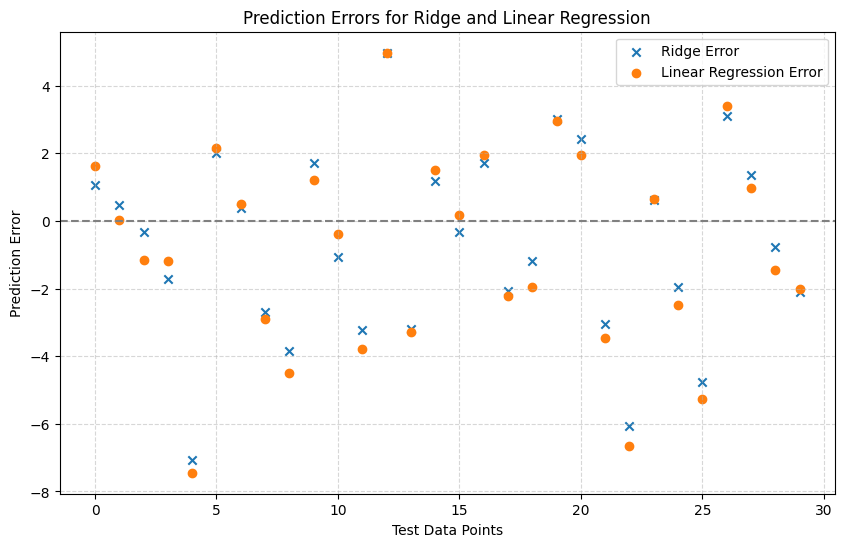

Mean Squared Error (Ridge): 8.141670945096934
Mean Squared Error (Linear Regression): 9.411780761656802


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Number of data points
num_points = 100

# Generating random data for features (X1, X2, ..., X10)
np.random.seed(42)  # For reproducibility
X = np.random.rand(num_points, 10) * 10  # Scale the random values to a range of [0, 10]

# Generating corresponding random target variable (y) with some noise
np.random.seed(42)  # For reproducibility
y = 2 * X[:, 0] + 3 * X[:, 1] + 1.5 * X[:, 2] - 4 * X[:, 3] + 0.5 * X[:, 4] + np.random.randn(num_points) * 3

# Add somewhat relevant features (X5 and X6)
X[:, 5] = X[:, 0] + X[:, 1] + np.random.randn(num_points) * 2
X[:, 6] = X[:, 3] + X[:, 4] + np.random.randn(num_points) * 2

# Add irrelevant features (X7, X8, X9, and X10)
X = np.hstack((X, np.random.randn(num_points, 4) * 3**np.random.randn()))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Ridge and simple linear regression models
ridge_model = Ridge()
linear_model = LinearRegression()

# Fit linear model on the training data
linear_model.fit(X_train, y_train)

# Perform Hyperparameter tuning using GridSearchCV for Ridge model
param_distributions = {
    'alpha': np.logspace(-5, 2, 100)  # Range of alpha values to try
}

grid_search = GridSearchCV(ridge_model, param_distributions, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the predictions for both models
y_pred_ridge = grid_search.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# Calculate individual errors for each data point
ridge_errors = y_test - y_pred_ridge
linear_errors = y_test - y_pred_linear

# Plotting the errors for each data point
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), ridge_errors, label='Ridge Error', marker='x')
plt.scatter(range(len(y_test)), linear_errors, label='Linear Regression Error', marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Test Data Points')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors for Ridge and Linear Regression')
plt.grid(True, ls='dashed', alpha=0.5)
plt.legend()
plt.show()

# Calculate MSE for Ridge and classic LinearRegression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print("Mean Squared Error (Ridge):", mse_ridge)
print("Mean Squared Error (Linear Regression):", mse_linear)

The Ridge regression model outperformed Linear regression, achieving a lower Mean Squared Error (MSE) of 8.14 compared to 9.41. The L2 regularization in Ridge regression helped prevent overfitting and improved generalization. The choice between the two models depends on the dataset characteristics and the need for interpretability. Ridge regression is beneficial for high-dimensional data and feature collinearity.